# DATASET

https://github.com/toulio/datasets_public/blob/main/README.md

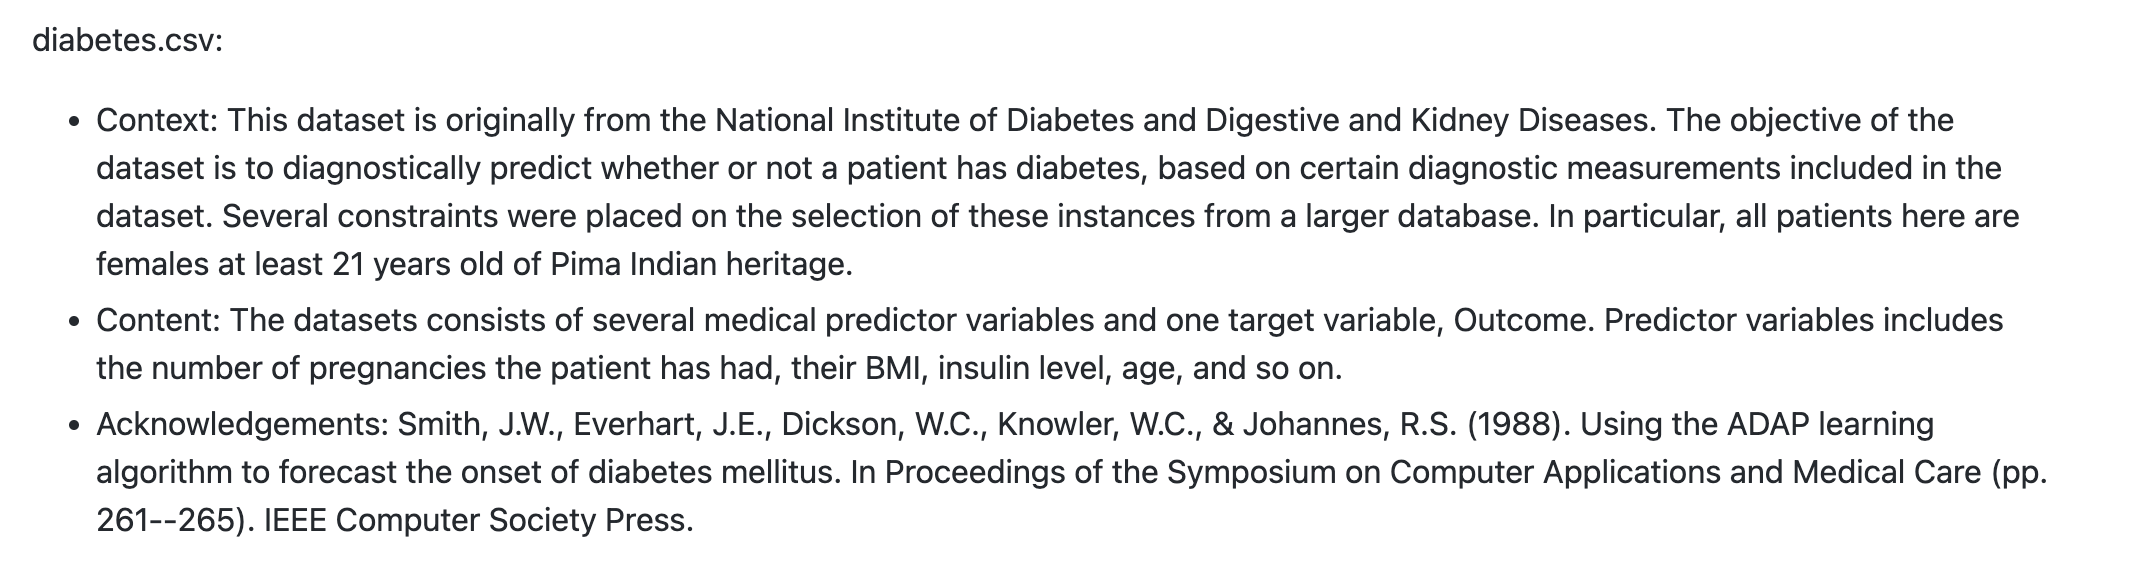

# INITIAL SETUP

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You have to include the full link to the csv file containing your dataset
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA CLEANING AND PREPARING THE DATA

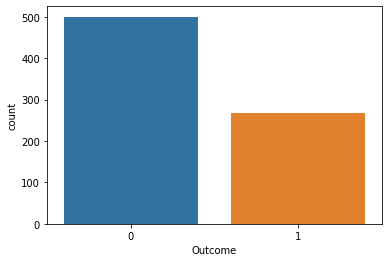

In [8]:
sns.countplot(x = 'Outcome', data = diabetes)


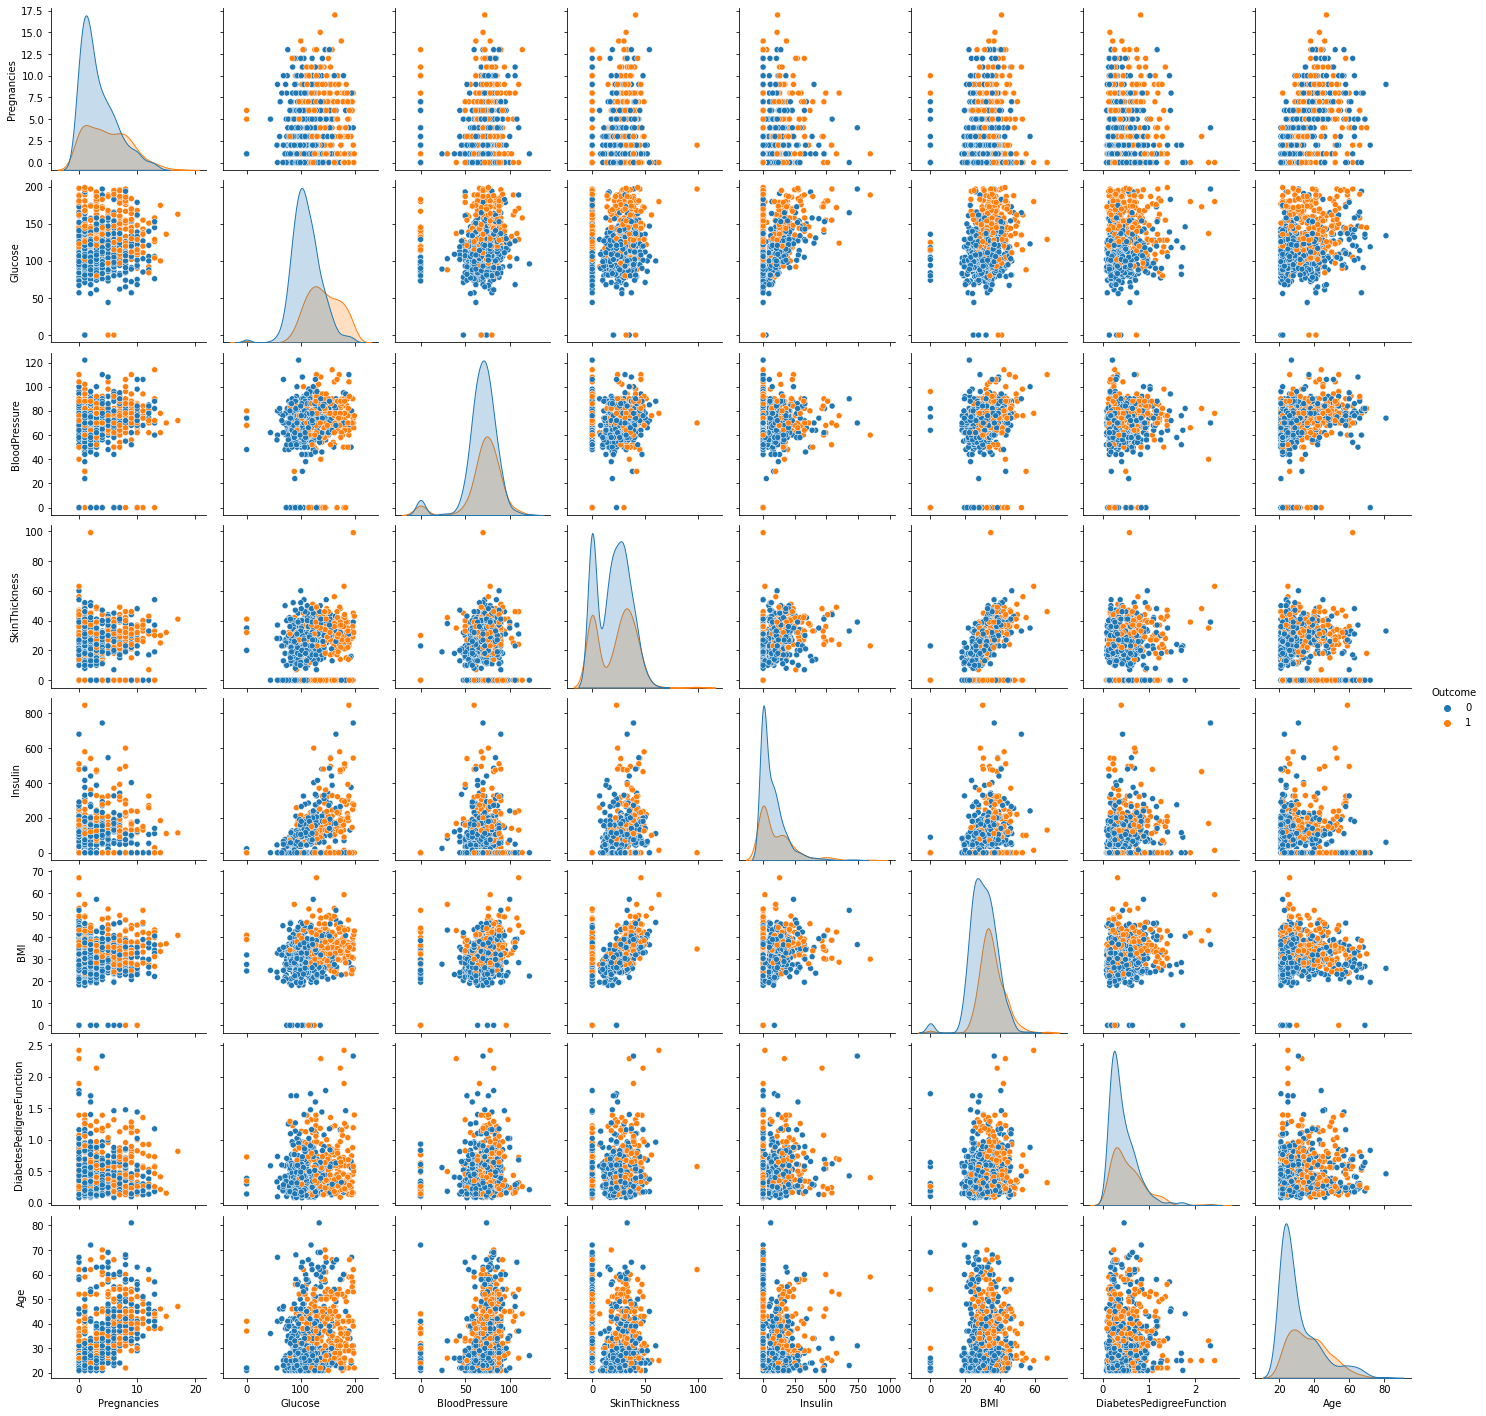

In [9]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

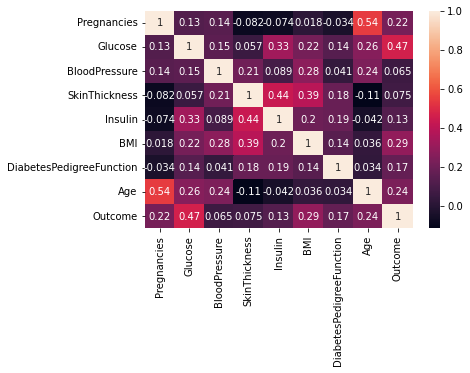

In [10]:
sns.heatmap(diabetes.corr(), annot = True)


In [17]:
X = diabetes.iloc[:, 0:8].values

In [18]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
y = diabetes.iloc[:, 8].values

In [20]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [21]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# CREATE AND TRAIN THE MODEL

In [26]:
binary_classifier = tf.keras.models.Sequential()
binary_classifier.add(tf.keras.layers.Dense(units=200, activation='relu', input_shape=(8, )))
binary_classifier.add(tf.keras.layers.Dense(units=200, activation='relu'))
binary_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [27]:
binary_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               1800      
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 42,201
Trainable params: 42,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
binary_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [29]:
epochs_hist = binary_classifier.fit(X_train, y_train, epochs = 100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 0.5753 - accuracy: 0.7296
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7801
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7769
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7899
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8013
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.7883
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.7866
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8013
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8046
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8111
Epoch 11/

In [30]:
y_pred = binary_classifier.predict(X_test)


In [31]:
y_pred

array([[9.7439134e-01],
       [5.7685375e-04],
       [3.9841863e-05],
       [1.4360070e-02],
       [1.4347613e-02],
       [9.8410819e-06],
       [6.0121740e-05],
       [9.1181397e-03],
       [9.2239916e-01],
       [4.3579948e-01],
       [6.1592460e-04],
       [9.9994421e-01],
       [6.5496910e-01],
       [2.8486907e-02],
       [2.2000074e-04],
       [5.4071006e-05],
       [3.9751601e-01],
       [6.8965852e-03],
       [6.3309407e-01],
       [2.3147665e-13],
       [4.6950579e-04],
       [6.0658306e-02],
       [5.5939960e-01],
       [4.2176247e-04],
       [9.4348192e-02],
       [3.5082796e-01],
       [3.1857193e-03],
       [1.8914592e-01],
       [7.4983537e-03],
       [1.5121698e-04],
       [3.7119138e-01],
       [5.4843664e-02],
       [5.9508979e-03],
       [3.9962649e-02],
       [9.3631911e-01],
       [5.2094126e-01],
       [3.7854028e-05],
       [9.9321258e-01],
       [2.4417043e-04],
       [9.9566758e-01],
       [2.1112555e-01],
       [8.014805

In [32]:
y_pred = (y_pred > 0.5)

In [33]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

# MODEL EVALUATION

In [34]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

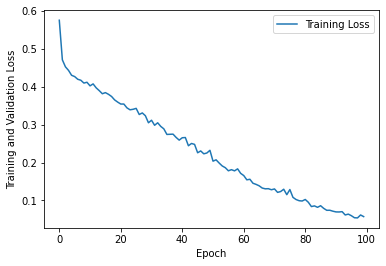

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

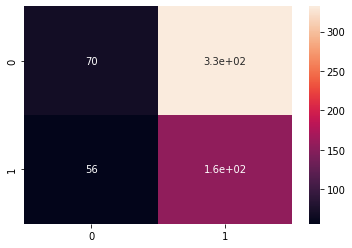

In [36]:
# Training set Performance
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.17      0.56      0.27       126
        True       0.74      0.32      0.45       488

    accuracy                           0.37       614
   macro avg       0.45      0.44      0.36       614
weighted avg       0.62      0.37      0.41       614



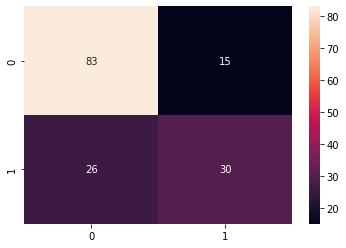

In [38]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        98
           1       0.67      0.54      0.59        56

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

